In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coil_B4 = '13368B4.csv'

with open(coil_B4) as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints:')
index = data.index('Values')


In [3]:
B4 = pd.DataFrame(data[start_index+1:index], columns =['Length'])
B4['B4_Values'] = data[index+1:-1]
B4.head()

,Length,B4_Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [4]:
B4['Length'] = pd.to_numeric(B4['Length'])
B4['B4_Values'] = pd.to_numeric(B4['B4_Values'])

print(B4.dtypes)

Length       float64
B4_Values    float64
dtype: object


In [5]:
B4 = B4.loc[~(B4==0).any(axis=1)]

In [6]:
print(B4.shape)
B4.head()

(425, 2)


,Length,B4_Values
22,0.437072,1204.8
23,0.874371,1204.8
24,1.312119,1220.0
25,1.749643,1227.4
26,2.187280,1226.7


In [7]:
# Opening the B5 file

coil_B5 = '13368B5.csv'
with open(coil_B5) as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints:')
index = data.index('Values')

In [8]:
B5 = pd.DataFrame(data[start_index+1:index], columns =['Length'])
B5['B5_Values'] = data[index+1:-1]

B5['Length'] = pd.to_numeric(B5['Length'])
B5['B5_Values'] = pd.to_numeric(B5['B5_Values'])

B5 = B5.loc[~(B5==0).any(axis=1)]

In [9]:
print(B5.shape)
B5.head()

(389, 2)


,Length,B5_Values
44,0.471807,1122.6
45,0.943523,1151.1
46,1.415510,1181.5
47,1.887611,1230.5
48,2.360073,1231.4


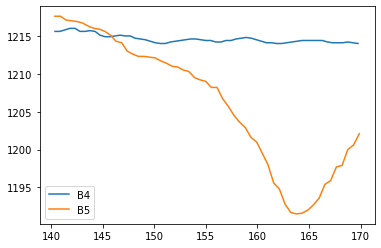

In [10]:
B4 = B4[B4.Length >= 140]
B5 = B5[B5.Length >= 140]

B4 = B4[B4.Length <= 170]
B5 = B5[B5.Length <= 170]

plt.plot(B4.Length,B4.B4_Values)
plt.plot(B5.Length,B5.B5_Values)
plt.legend(['B4','B5'])
plt.show()

In [11]:
B4

,Length,B4_Values
326,140.3754,1215.6
327,140.8598,1215.6
328,141.3446,1215.8
329,141.8300,1216.0
330,142.3157,1216.0
...,...,...
382,167.7722,1214.1
383,168.2654,1214.1
384,168.7594,1214.2
385,169.2535,1214.1


In [12]:
index = 0
B4_array = B4['Length'].to_numpy()
B5_array = B5['Length'].to_numpy()

for each in B5.Length:
    
    closest = np.abs(B4_array-each)
    smallest_difference_index = closest.argmin()
    closest_element = B4_array[smallest_difference_index]
    
    print(closest_element)
    
    B5_array[index] = closest_element
    index+=1
    
pd.set_option('display.max_rows', 200)

B5.Length = B5_array 
B5

140.3754
140.8598
141.3446
141.83
142.3157
143.2873
143.773
144.2591
144.7452
145.2315
145.7179
146.2041
146.6905
147.1781
148.1529
148.6405
149.128
149.6155
150.1034
150.5908
151.0782
151.5666
152.0549
153.0324
153.5213
154.0105
154.4996
154.9888
155.4783
155.9684
156.4588
156.9493
157.9311
158.4223
158.9137
159.4048
159.8956
160.3864
160.8772
161.368
162.3521
162.8449
163.3375
163.8303
164.3229
164.8159
165.3086
165.8013
166.294
167.2796
167.7722
168.2654
168.7594
169.2535
169.7481


,Length,B5_Values
325,140.3754,1217.6
326,140.8598,1217.6
327,141.3446,1217.1
328,141.8300,1217.0
329,142.3157,1216.9
330,143.2873,1216.7
331,143.7730,1216.3
332,144.2591,1216.0
333,144.7452,1215.9
334,145.2315,1215.6


In [13]:
merged_df = pd.merge(B4,B5, how= 'left')
merged_df

,Length,B4_Values,B5_Values
0,140.3754,1215.6,1217.6
1,140.8598,1215.6,1217.6
2,141.3446,1215.8,1217.1
3,141.8300,1216.0,1217.0
4,142.3157,1216.0,1216.9
5,142.8014,1215.6,NaN
6,143.2873,1215.6,1216.7
7,143.7730,1215.7,1216.3
8,144.2591,1215.6,1216.0
9,144.7452,1215.1,1215.9


In [14]:
merged_df['difference'] = merged_df['B5_Values']-merged_df['B4_Values']
merged_df

,Length,B4_Values,B5_Values,difference
0,140.3754,1215.6,1217.6,2.0
1,140.8598,1215.6,1217.6,2.0
2,141.3446,1215.8,1217.1,1.3
3,141.8300,1216.0,1217.0,1.0
4,142.3157,1216.0,1216.9,0.9
5,142.8014,1215.6,NaN,NaN
6,143.2873,1215.6,1216.7,1.1
7,143.7730,1215.7,1216.3,0.6
8,144.2591,1215.6,1216.0,0.4
9,144.7452,1215.1,1215.9,0.8


In [15]:
merged_df.fillna(method ='bfill', inplace = True)
merged_df.fillna(method ='pad', inplace = True)
merged_df

,Length,B4_Values,B5_Values,difference
0,140.3754,1215.6,1217.6,2.0
1,140.8598,1215.6,1217.6,2.0
2,141.3446,1215.8,1217.1,1.3
3,141.8300,1216.0,1217.0,1.0
4,142.3157,1216.0,1216.9,0.9
5,142.8014,1215.6,1216.7,1.1
6,143.2873,1215.6,1216.7,1.1
7,143.7730,1215.7,1216.3,0.6
8,144.2591,1215.6,1216.0,0.4
9,144.7452,1215.1,1215.9,0.8


In [16]:
for value in merged_df['difference']:
    if value <= -4:
        print('Houston, we have constriction')
    elif value >=4:
        print('We have expanded')

Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, we have constriction
Houston, w

In [17]:
print(merged_df[merged_df['difference']<=-4].index.values)

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
